Matteo Picciolini
# Esercitazione 9

In [1]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#numpy
import numpy as np

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Problema del commesso viaggitatore
Il problema del commesso viaggiatore (Traveling Salesman Problem, TSP) è un noto problema di ottimizzazione combinatoria. L'obiettivo è trovare il percorso più breve che un commesso viaggiatore deve seguire per visitare un insieme di città esattamente una volta e poi ritornare alla città di partenza.

Formalmente, dato un insieme di città e le distanze tra ciascuna coppia di città, il problema consiste nel trovare il percorso che minimizza la lunghezza totale del tragitto. Il percorso deve soddisfare il vincolo di passare attraverso ogni città una sola volta e tornare alla città di partenza.

Nel nostro caso, il "commesso" è rappresentato da un piccione che si sposta in linea d'aria da una città all'altra. Pertanto, il percorso ottimale da trovare è una particolare permutazione delle coordinate delle città che minimizza una "funzione costo". Abbiamo due opzioni per questa funzione costo:

$$L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2$$
$$L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$$
Dove $\vec{x}_{N+1}=\vec{x}_1$. Nella mia analisi, ho scelto di utilizzare $L^{(1)}$ per semplificare il confronto con i risultati attesi.

## Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference
- 34 cities randomly placed **inside** a square

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm<
- a picture of the best path in cartesian coordinates

### Algoritmo genetico
L'algorimo che ho scritto per risolvere questo problema agisce come segue:
- Inizialmente, vengono generati diversi percorsi potenziali per risolvere il problema. Ogni percorso viene valutato sulla base della sua "bontà" utilizzando un operatore di valutazione specifico per i percorsi.

- Viene, quindi, utilizzato un operatore di selezione per estrarre i migliori individui, che saranno soggetti a mutazioni per generare la successiva generazione di percorsi. L'operatore di selezione estrae gli individui in base al loro indice intero $j$ nella popolazione ordinata, utilizzando la seguente formula:
$$
j= \text{int}\left[M \cdot (1- r^p)\right]+1
$$ 
dove $r$ è un numero casuale compreso tra 0 e 1 e $p$ è un opportuno esponente. Le mutazioni sono implementati attraverso operatori di mutazione, ed ad ognuna di essa è associata una probabilità di realizzarsi (tipicamente $p^{(i)}_m < 10\%$). Le mutazioni che ho usato sono quelle consigliate nella consegna dell'esercizio, per cui mutazioni di riarrangiamento dei geni e di crossover tra "cromosomi". In generale, per un algoritmo genetico, più mutazioni si implementano, meglio viene sondato lo spazio delle soluzioni, evitando, quindi, la convergenza dell'algoritmo verso minimi locali. 

- I figli degli individui mutati vengono salvati in una nuova generazione, e il processo riparte dal primo punto in modo ciclico. Questo ciclo continua fino a quando non viene soddisfatta la condizione di stop (il numero massimo di cicli).

### Risoluzione

#### Circonferenza


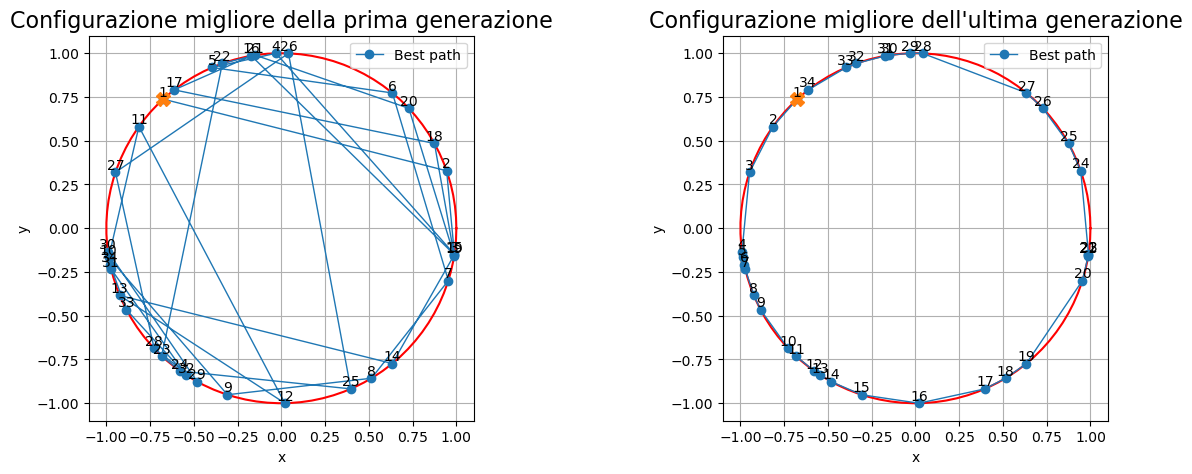

In [2]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

theta = np.linspace(0, 2 * np.pi, 100)
x_c = np.cos(theta)
y_c = np.sin(theta)
axs[0].plot(x_c, y_c, c = 'red')

x, y = np.loadtxt("../Data/09.1_circ_city_coord_001.dat", usecols = (0, 1), delimiter = ' ', unpack = True)
axs[0].plot(x, y, marker = "o", lw = "1",  label = 'Best path')
for i in range(len(x)):
    axs[0].text(x[i], y[i], str(i + 1), ha = 'center', va = 'bottom')
axs[0].plot(x[0], y[0], marker = "X", markersize = 10)
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')
axs[0].grid(True)
axs[0].set_title('Configurazione migliore della prima generazione', fontsize = 16)
axs[0].set_aspect('equal')
axs[0].legend();


axs[1].plot(x_c, y_c, c = 'red')
x, y = np.loadtxt("../Data/09.1_circ_city_coord_500.dat", usecols = (0, 1), delimiter = ' ', unpack = True)
plt.plot(x, y, marker = "o", lw = "1",  label = 'Best path')
for i in range(len(x)):
    axs[1].text(x[i], y[i], str(i + 1), ha = 'center', va = 'bottom')
axs[1].plot(x[0], y[0], marker = "X", markersize = 10)
axs[1].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].grid(True)
axs[1].set_title("Configurazione migliore dell'ultima generazione", fontsize = 16)
axs[1].set_aspect('equal')
axs[1].legend(loc = "upper right");
plt.show()

<img src="../Data/09.1_circ_animation.gif"/>


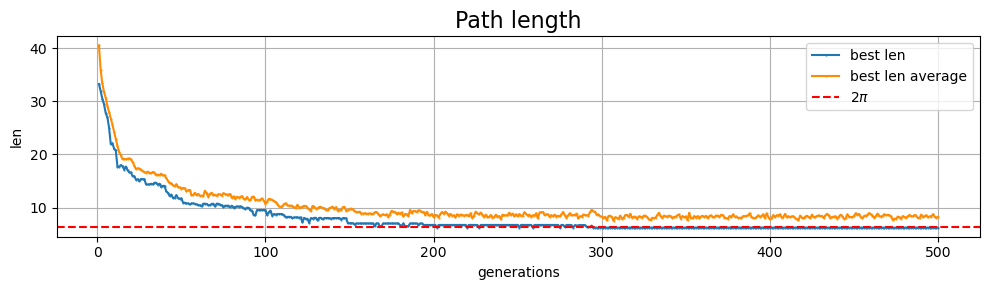

In [3]:
plt.figure(figsize = (10,3))
x_best_len, y_best_len = np.loadtxt('../Data/09.1_circ_best_len.dat', unpack = True, usecols = (0, 1)) 
plt.plot(x_best_len, y_best_len, marker = 'o', 
             markersize = 0.5, label = 'best len')
x_best_len_ave, y_best_len_ave = np.loadtxt('../Data/09.1_circ_best_len_average.dat', unpack = True, usecols = (0, 1)) 
plt.plot(x_best_len_ave, y_best_len_ave, marker = 'o', 
             markersize = 0.5, label = 'best len average', color = 'darkorange')

plt.axhline(y = 2*np.pi, color = 'r', linestyle = '--', label = '$2\pi$')
plt.title('Path length', fontsize = 16)
plt.ylabel('len')
plt.xlabel('generations')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Quadrato

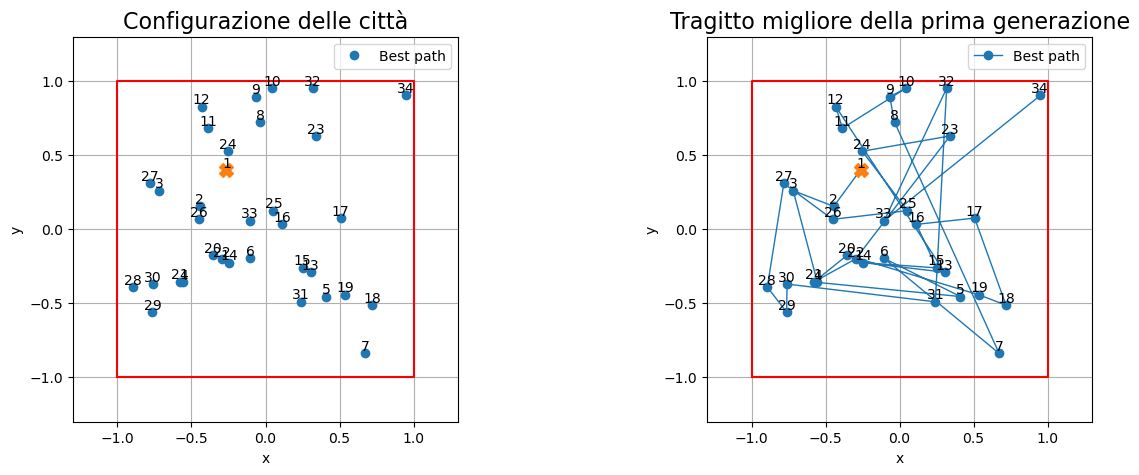

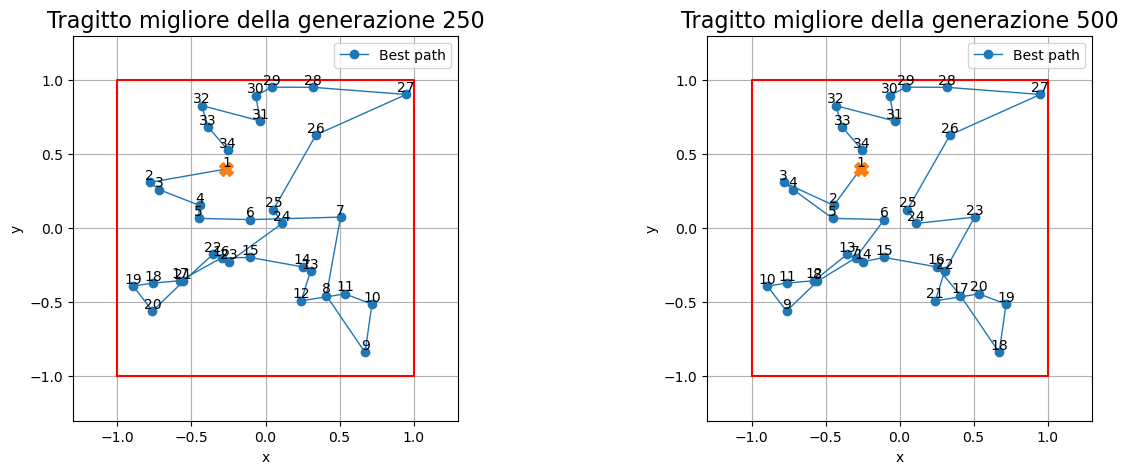

In [4]:
x_sq = [-1, -1, 1, 1, -1]
y_sq = [-1, 1, 1, -1, -1]

#FIRST ROW
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].plot(x_sq, y_sq, c = 'red')
x, y = np.loadtxt("../Data/09.1_square_city_coord_001.dat", usecols = (0, 1), delimiter = ' ', unpack = True)
axs[0].plot(x, y, marker = "o", linestyle = 'none',  label = 'Best path')
for i in range(len(x)):
    axs[0].text(x[i], y[i], str(i + 1), ha = 'center', va = 'bottom')
axs[0].plot(x[0], y[0], marker = "X", markersize = 10)
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')
axs[0].grid(True)
axs[0].set_title('Configurazione delle città', fontsize = 16)
axs[0].set_aspect('equal')
axs[0].set_xlim(-1.3, 1.3)
axs[0].set_ylim(-1.3, 1.3)
axs[0].legend();

axs[1].plot(x_sq, y_sq, c = 'red')
x, y = np.loadtxt("../Data/09.1_square_city_coord_001.dat", usecols = (0, 1), delimiter = ' ', unpack = True)
plt.plot(x, y, marker = "o", lw = "1", linestyle = '-', label = 'Best path')
for i in range(len(x)):
    axs[1].text(x[i], y[i], str(i + 1), ha = 'center', va = 'bottom')
axs[1].plot(x[0], y[0], marker = "X", markersize = 10)
axs[1].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].grid(True)
axs[1].set_title("Tragitto migliore della prima generazione", fontsize = 16)
axs[1].set_aspect('equal')
axs[1].legend(loc = "upper right");
axs[1].set_xlim(-1.3, 1.3)
axs[1].set_ylim(-1.3, 1.3)
plt.show()



#SECOND ROW
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].plot(x_sq, y_sq, c = 'red')
x, y = np.loadtxt("../Data/09.1_square_city_coord_250.dat", usecols = (0, 1), delimiter = ' ', unpack = True)
axs[0].plot(x, y, marker = "o", linestyle = '-', lw = 1,  label = 'Best path')
for i in range(len(x)):
    axs[0].text(x[i], y[i], str(i + 1), ha = 'center', va = 'bottom')
axs[0].plot(x[0], y[0], marker = "X", markersize = 10)
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')
axs[0].grid(True)
axs[0].set_title('Tragitto migliore della generazione 250', fontsize = 16)
axs[0].set_aspect('equal')
axs[0].set_xlim(-1.3, 1.3)
axs[0].set_ylim(-1.3, 1.3)
axs[0].legend();

axs[1].plot(x_sq, y_sq, c = 'red')
x, y = np.loadtxt("../Data/09.1_square_city_coord_500.dat", usecols = (0, 1), delimiter = ' ', unpack = True)
plt.plot(x, y, marker = "o", lw = "1", linestyle = '-', label = 'Best path')
for i in range(len(x)):
    axs[1].text(x[i], y[i], str(i + 1), ha = 'center', va = 'bottom')
axs[1].plot(x[0], y[0], marker = "X", markersize = 10)
axs[1].set_ylabel('y')
axs[1].set_xlabel('x')
axs[1].grid(True)
axs[1].set_title("Tragitto migliore della generazione 500", fontsize = 16)
axs[1].set_aspect('equal')
axs[1].legend(loc = "upper right");
axs[1].set_xlim(-1.3, 1.3)
axs[1].set_ylim(-1.3, 1.3)
plt.show()

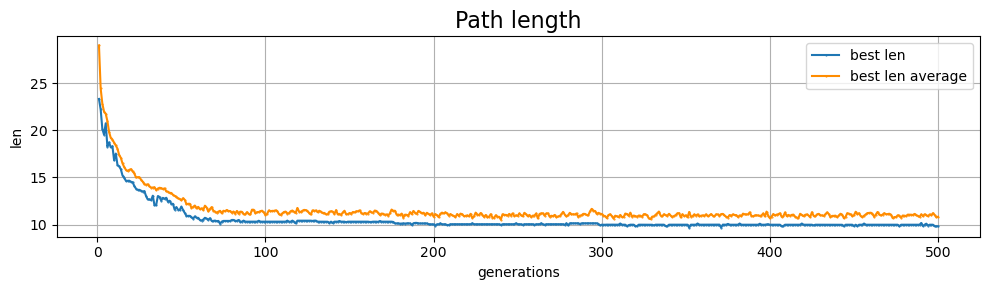

In [6]:
plt.figure(figsize = (10,3))
x_best_len, y_best_len = np.loadtxt('../Data/09.1_square_best_len.dat', unpack = True, usecols = (0, 1)) 
plt.plot(x_best_len, y_best_len, marker = 'o', 
             markersize = 0.5, label = 'best len')
x_best_len_ave, y_best_len_ave = np.loadtxt('../Data/09.1_square_best_len_average.dat', unpack = True, usecols = (0, 1)) 
plt.plot(x_best_len_ave, y_best_len_ave, marker = 'o', 
             markersize = 0.5, label = 'best len average', color = 'darkorange')
plt.title('Path length', fontsize = 16)
plt.ylabel('len')
plt.xlabel('generations')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<img src="../Data/09.1_square_animation.gif"/>